In [1]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from google.colab import drive
import warnings
import matplotlib.pyplot as plt
drive.mount('/content/drive')
warnings.filterwarnings("ignore")
factor_path = '/content/drive/MyDrive/Colab Notebooks/Independent project_2023 Summer/FactorData/AllFactors/'
trading_pairs = {'JBF':'3443','QWF':'2388','HCF':'2498','DBF':'2610','EHF':'1319','IPF':'3035','IIF':'3006','QXF':'2615','PEF':'5425','NAF':'3105'}

Mounted at /content/drive


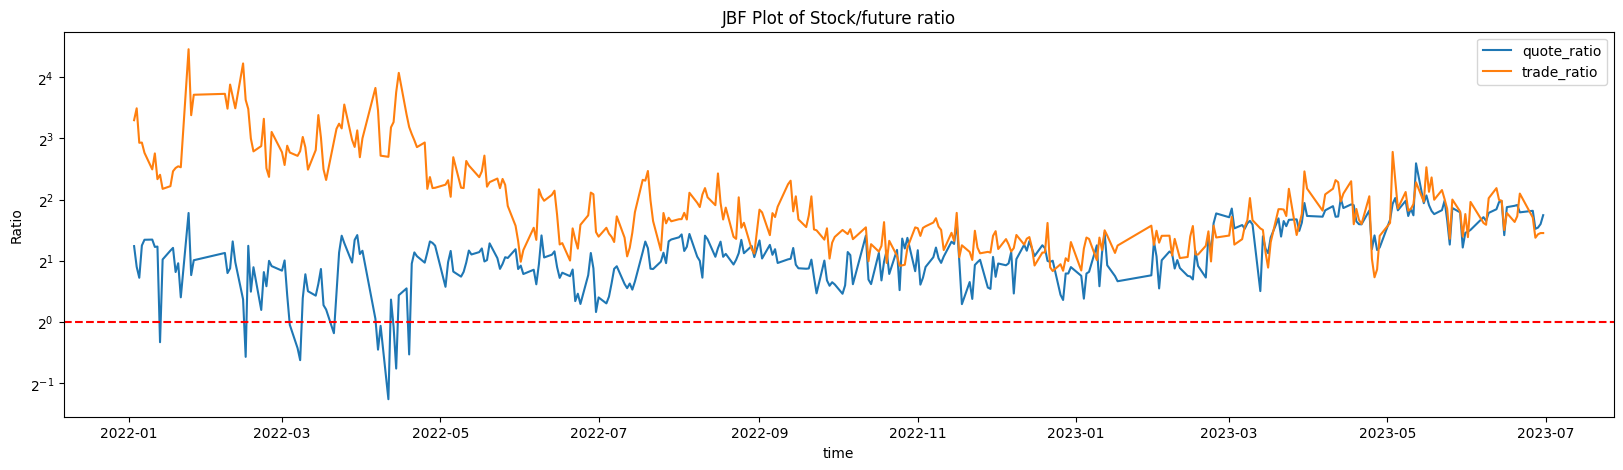

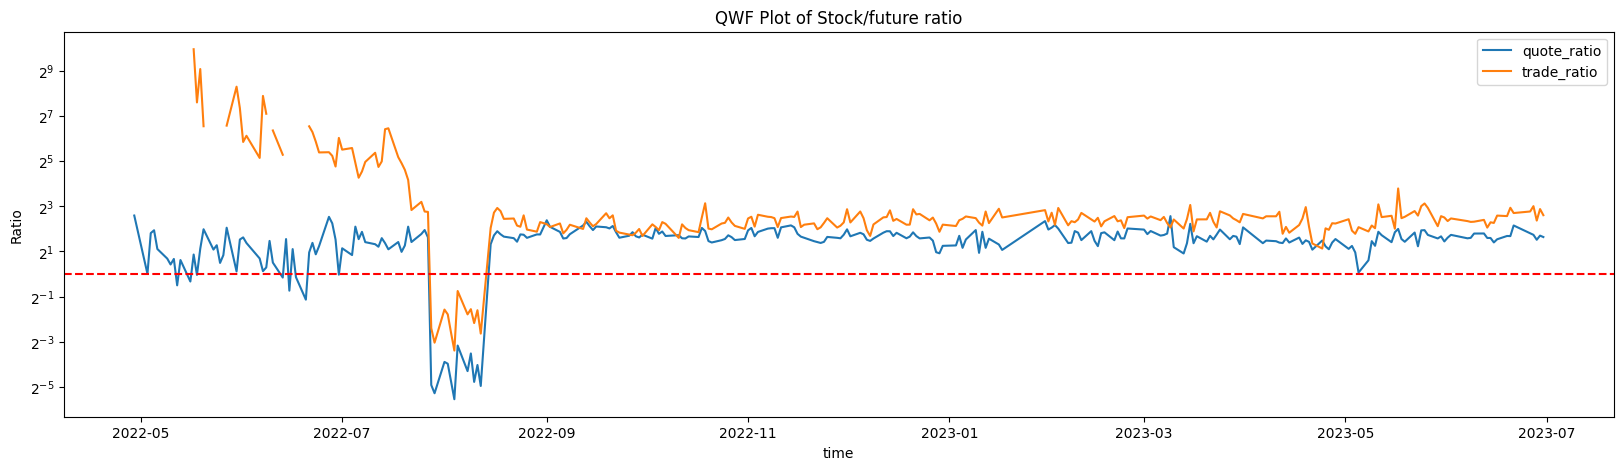

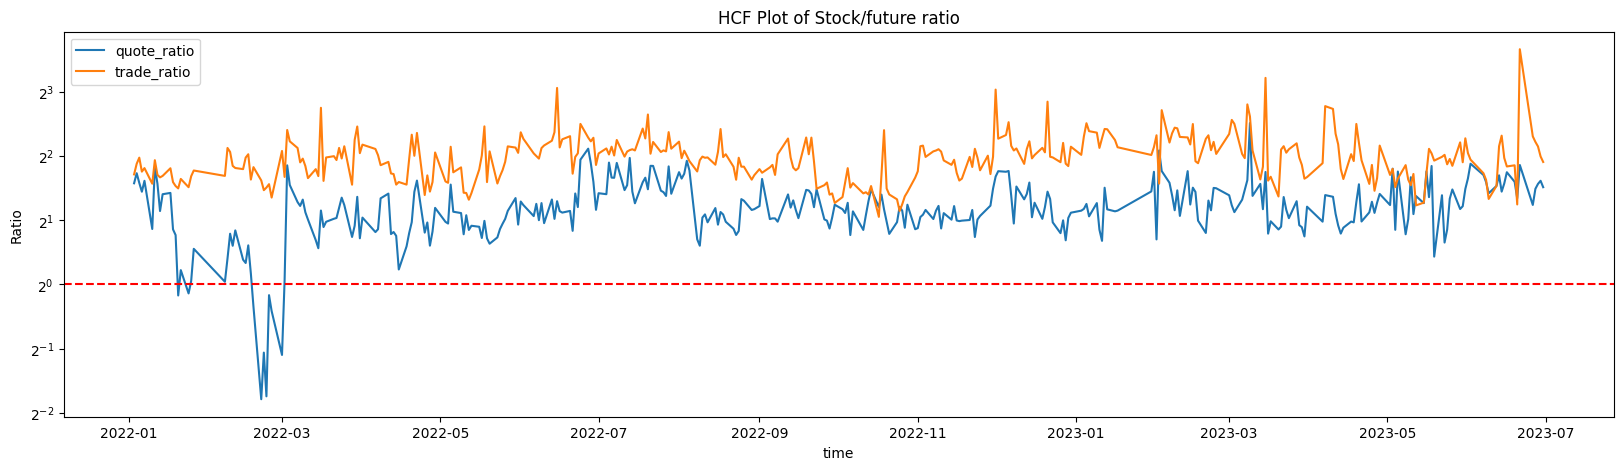

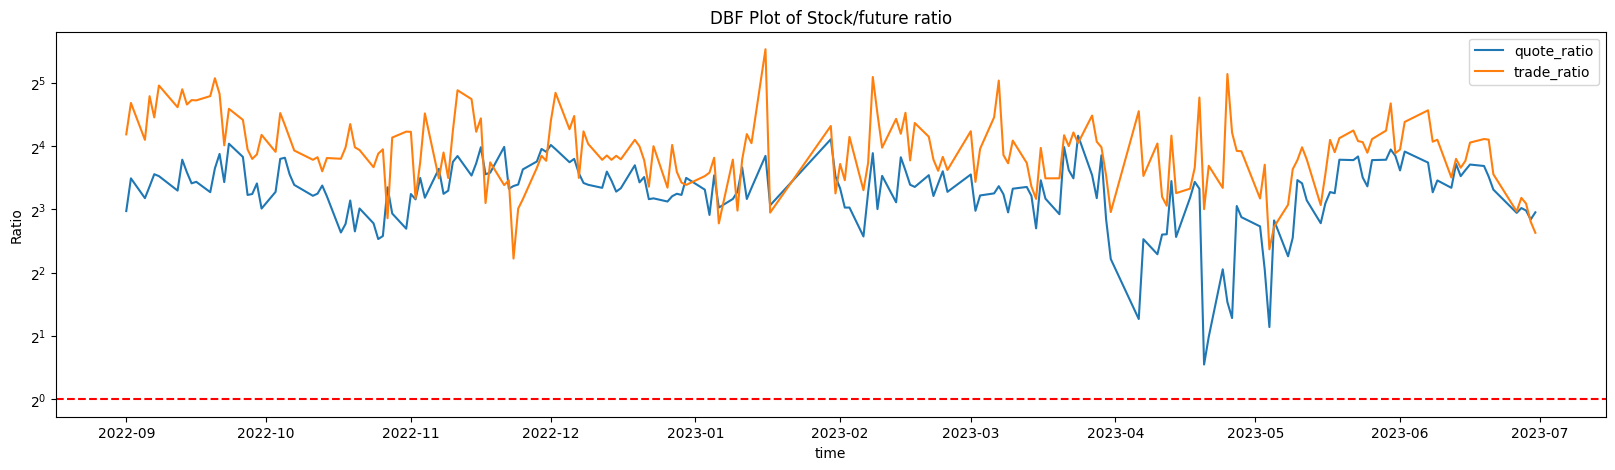

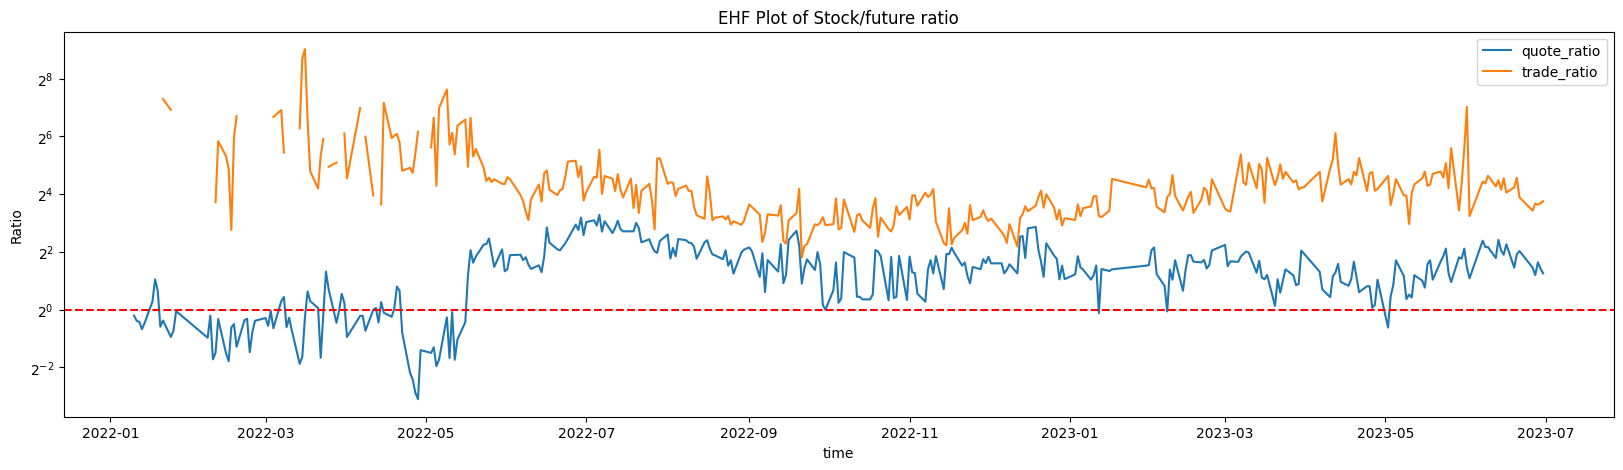

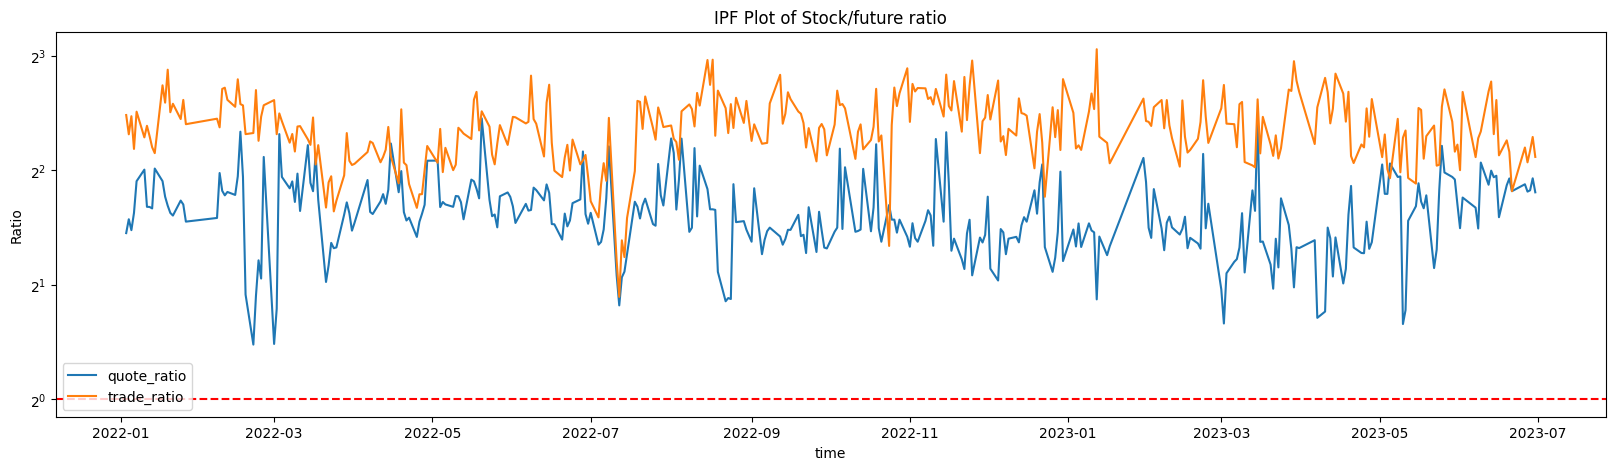

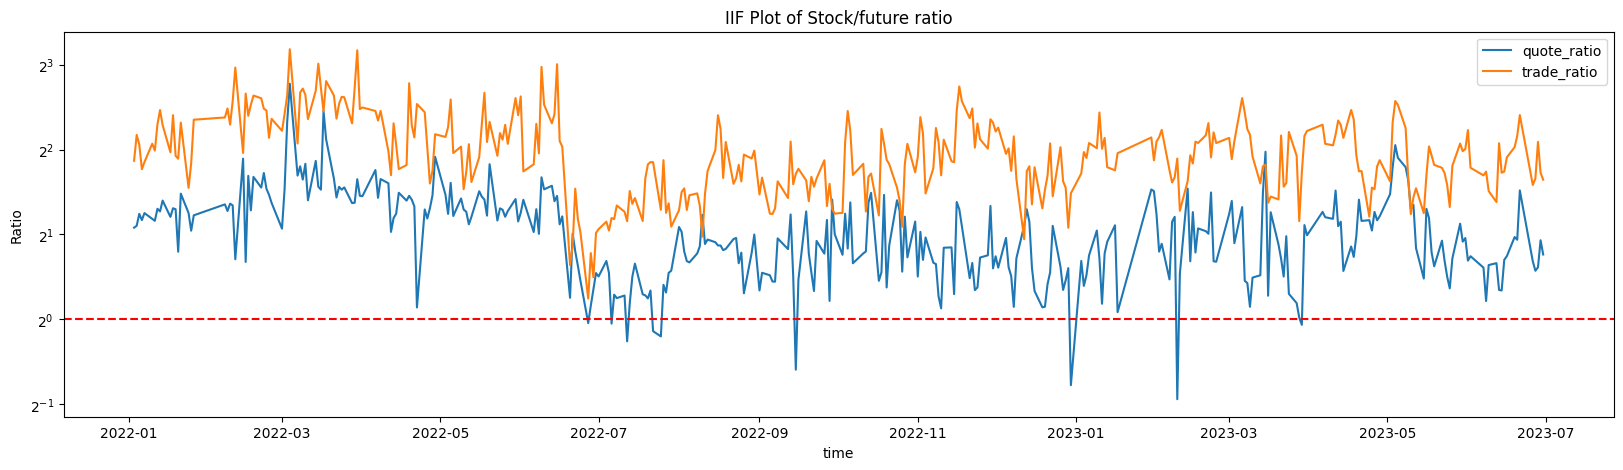

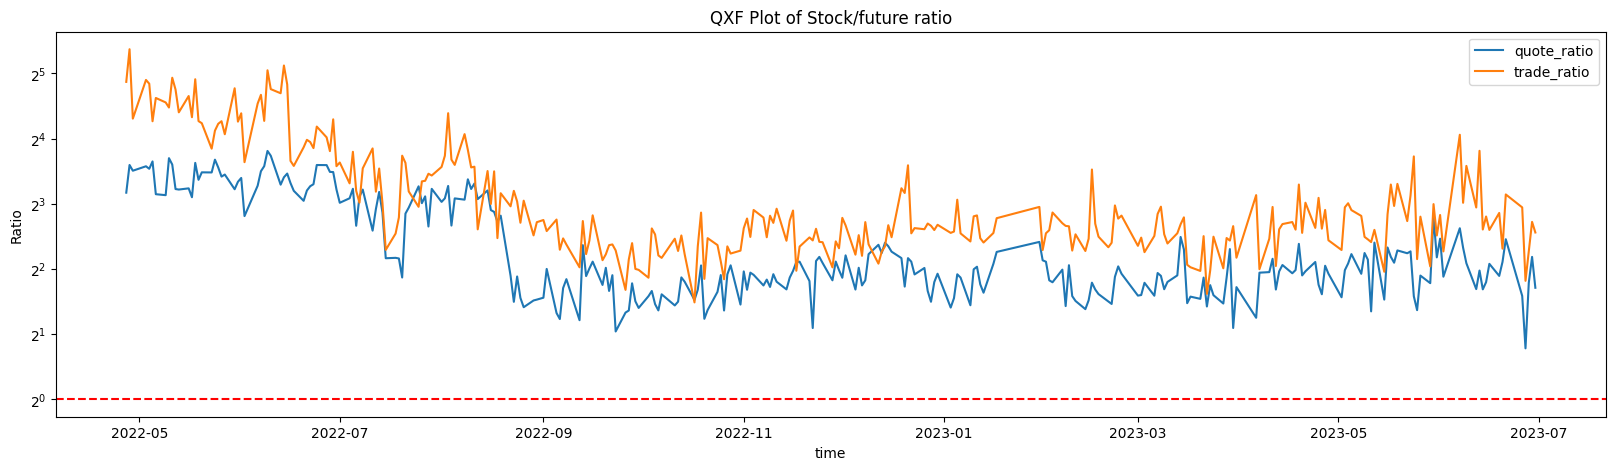

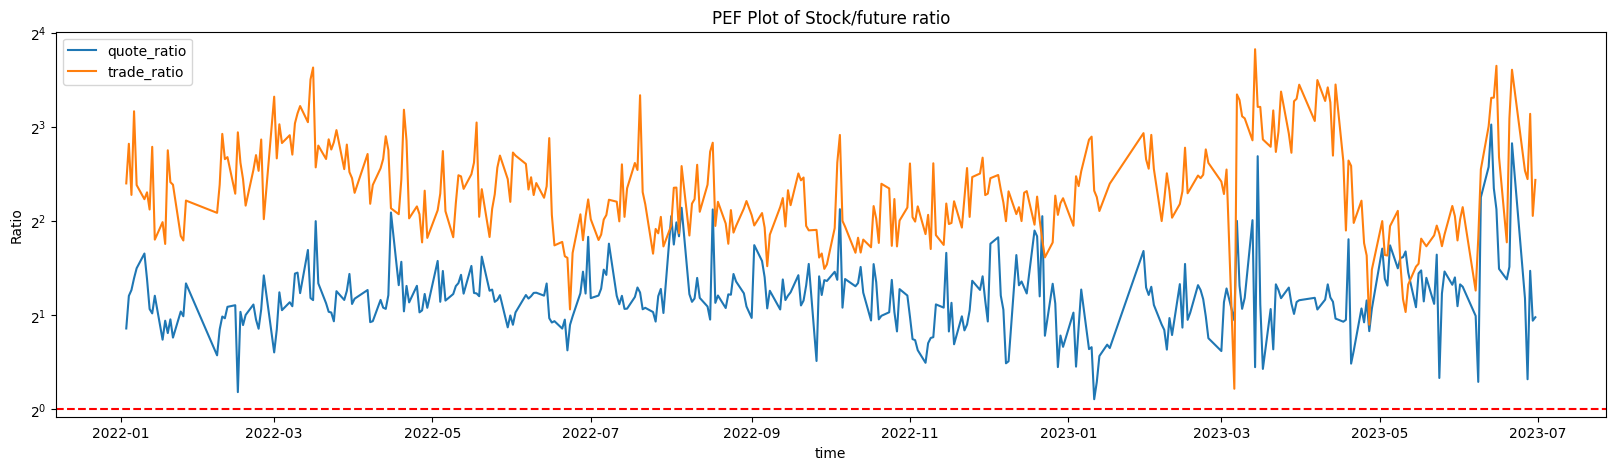

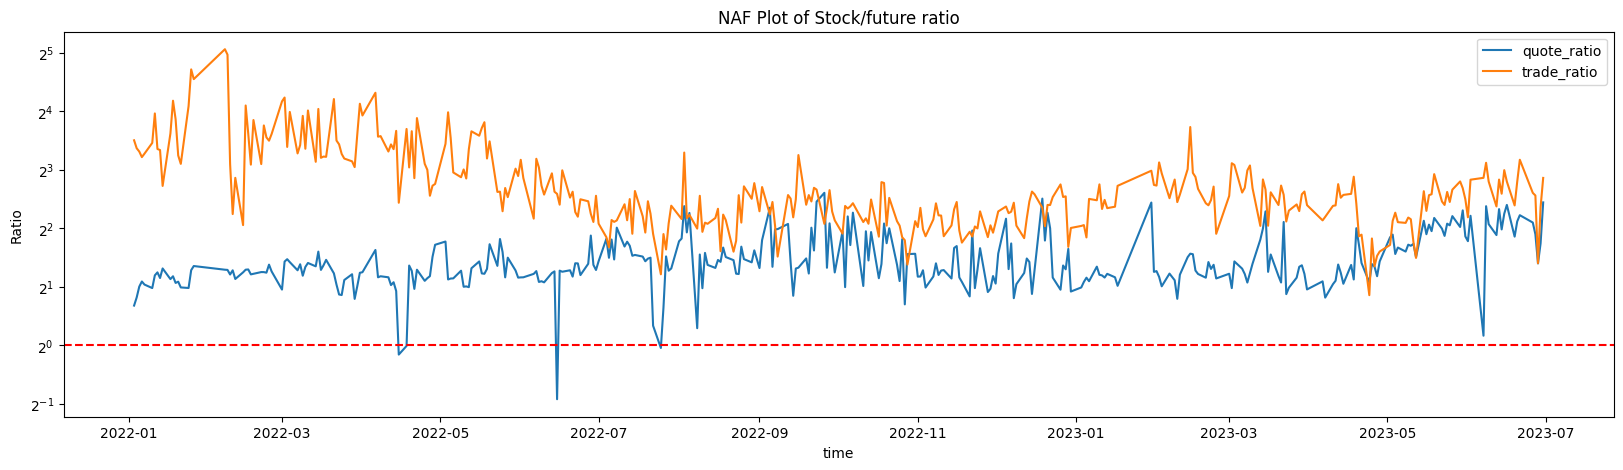

In [34]:
for future_name in trading_pairs.keys():
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Independent project_2023 Summer/FactorData/AllFactors/' + future_name +'.csv',index_col=0, parse_dates=True)
  data = data.loc[:,['quote_count_futures','trade_count_futures','trade_count_stock','quote_count_stock']]
  spread = data.reset_index()
  spread['date'] = spread['time_stamp'].dt.date
  spread['time'] = spread['time_stamp'].dt.time
  spread = spread.set_index('time_stamp', drop = True)
  grouped_data = spread.groupby(spread['date'])['quote_count_futures','trade_count_futures','trade_count_stock','quote_count_stock'].sum()
  grouped_data['quote_ratio'] =  (grouped_data['quote_count_stock']) / (grouped_data['quote_count_futures'])
  grouped_data['trade_ratio'] =  (grouped_data['trade_count_stock']) / (grouped_data['trade_count_futures'])
  plt.figure(figsize=(20, 5))
  grouped_data['quote_ratio'].plot()
  grouped_data['trade_ratio'].plot()
  # Add labels and title
  plt.legend(['quote_ratio', 'trade_ratio'])
  plt.xlabel('time')
  plt.yscale('log', base = 2)
  plt.ylabel('Ratio')
  plt.axhline(y=1, color='red', linestyle='dashed')
  plt.title(future_name + ' Plot of Stock/future ratio')
  plt.show()